# Whitewine Quality Prediction

## Adding Google Drive and Importing Necessary Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np                # used to create numpy arrays
import pandas as pd               # pandas Library is used to create pandas dataframe which is very useful for data analyze and process the data
import matplotlib.pyplot as plt   # for plots and graphs
import seaborn as sns             # for data visualizing, making plots and graphs
from sklearn.model_selection import train_test_split, cross_val_score # used to split data into train and test. we won't split manually, rather use this library function
from sklearn.metrics import accuracy_score # to evaluate our model, how well our model is performing
import plotly.express as px
from sklearn.metrics import classification_report

## Dataset Collection

In [3]:
whitewineDF = pd.read_csv('/content/drive/MyDrive/Machine Learning/DataSet/winequality-white.csv', delimiter= ';') # loading dataset to a Pandas Dataframe
print("(Rows, columns): " + str(whitewineDF.shape)) # number of rows and columns dataframe.shape
whitewineDF.head(5) # printing first 5 rows of the dataset

(Rows, columns): (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Checking for missing values
whitewineDF.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Analysis and Visualization

In [5]:
whitewineDF.describe() # f

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
px.histogram(whitewineDF, x='quality').show()

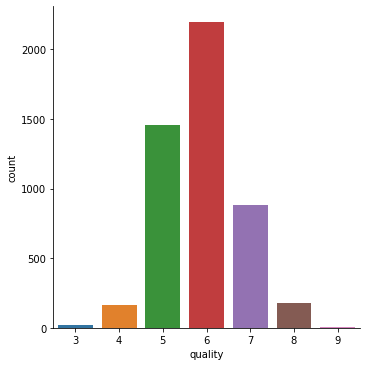

In [7]:
# number of values for each quality
sns.catplot(x = 'quality', data = whitewineDF, kind='count')

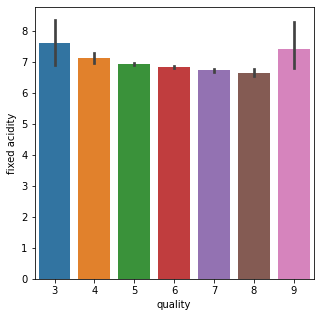

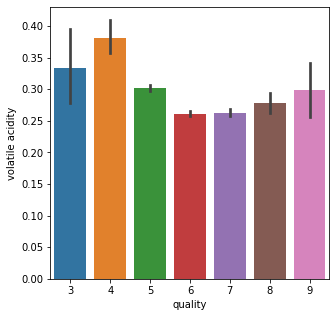

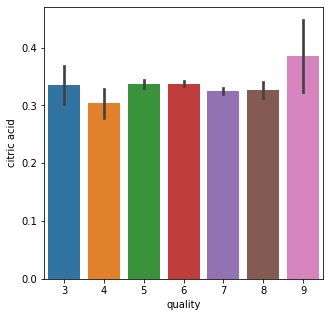

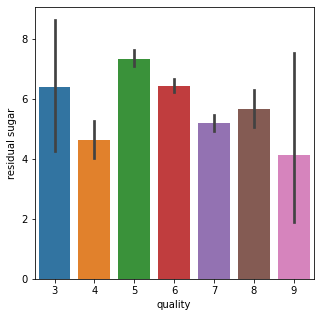

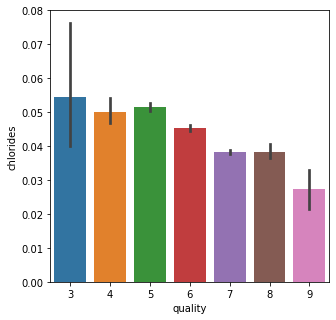

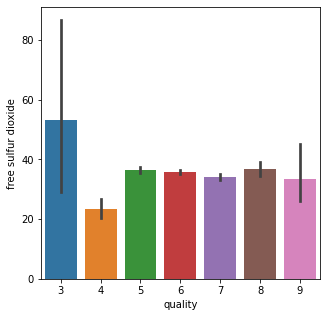

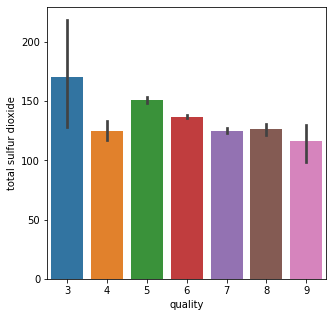

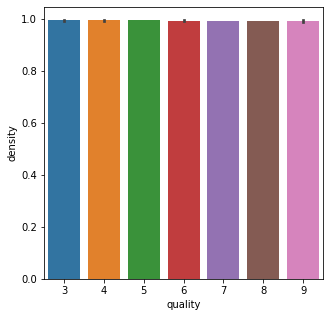

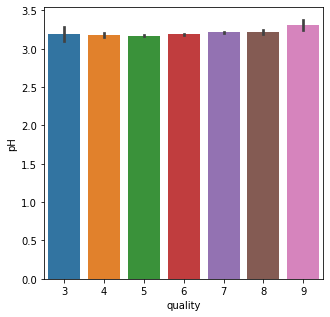

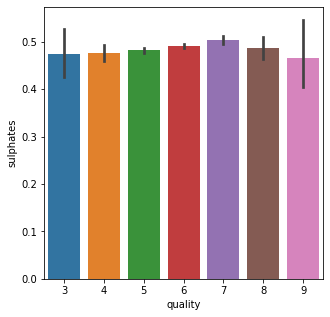

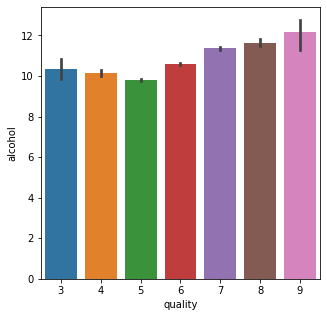

In [8]:
# fixed acidity vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'fixed acidity', data = whitewineDF) # creating barplot

# volatile acidity vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'volatile acidity', data = whitewineDF) # creating barplot

# citric acid vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'citric acid', data = whitewineDF) # creating barplot

# residual sugar vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'residual sugar', data = whitewineDF) # creating barplot

# chlorides vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'chlorides', data = whitewineDF) # creating barplot

# free sulfur dioxide vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = whitewineDF) # creating barplot

# total sulfur dioxide vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = whitewineDF) # creating barplot

# density vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'density', data = whitewineDF) # creating barplot

# pH vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'pH', data = whitewineDF) # creating barplot

# sulphates vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'sulphates', data = whitewineDF) # creating barplot

# alcohol vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'alcohol', data = whitewineDF) # creating barplot

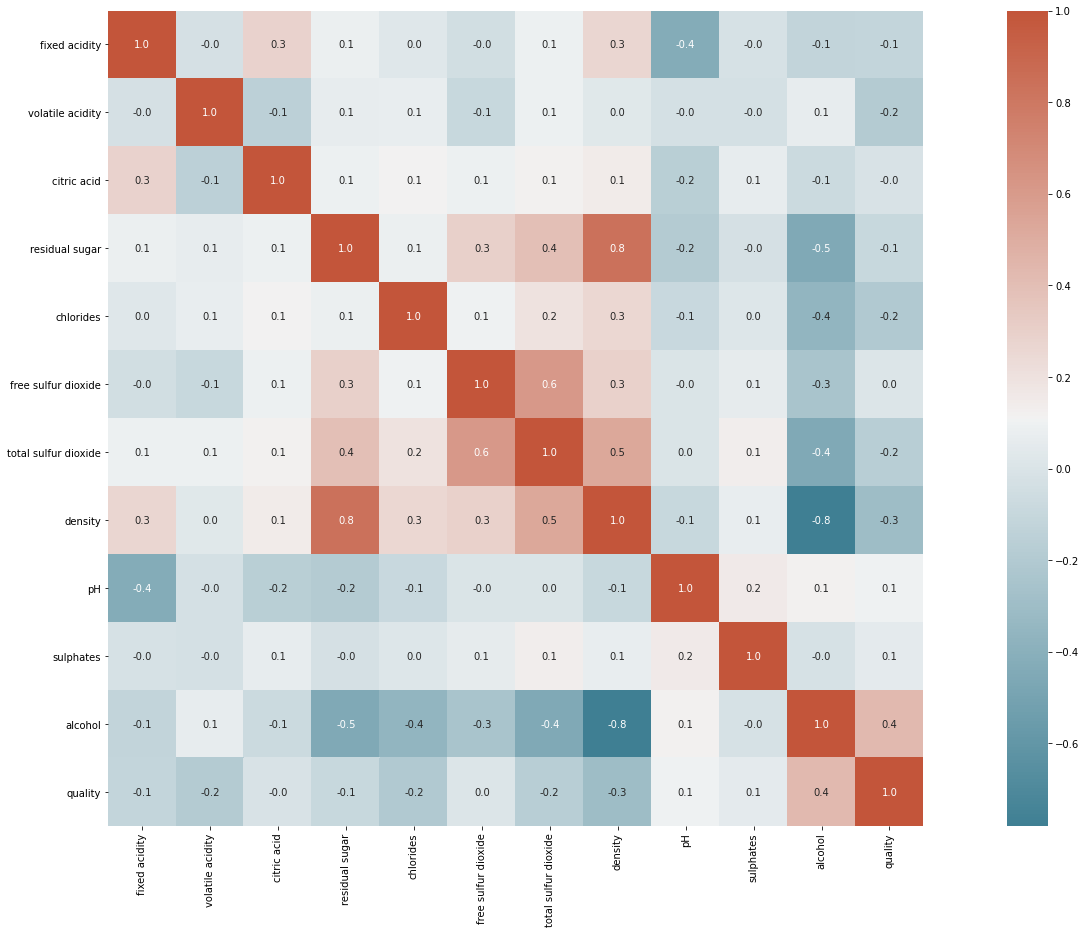

In [9]:
correlation = whitewineDF.corr() # finding correlation values using .corr() and later we are applying it for our heatmap

# constructing a heat map to understand the correlation between the columns
plt.figure(figsize = (30, 15))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Data Preprocessing

In [10]:
X = whitewineDF.drop('quality', axis=1) # axis 1 when dropping columns, and 0 when dropping rows
print(X) # printing feature variables

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.0              0.27         0.36  ...  3.00       0.45      8.8
1               6.3              0.30         0.34  ...  3.30       0.49      9.5
2               8.1              0.28         0.40  ...  3.26       0.44     10.1
3               7.2              0.23         0.32  ...  3.19       0.40      9.9
4               7.2              0.23         0.32  ...  3.19       0.40      9.9
...             ...               ...          ...  ...   ...        ...      ...
4893            6.2              0.21         0.29  ...  3.27       0.50     11.2
4894            6.6              0.32         0.36  ...  3.15       0.46      9.6
4895            6.5              0.24         0.19  ...  2.99       0.46      9.4
4896            5.5              0.29         0.30  ...  3.34       0.38     12.8
4897            6.0              0.21         0.38  ...  3.26       0.32     11.8

[4898 rows x 11

In [11]:
Y = whitewineDF['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0) 
print(Y) # target varibales into 0 or 1

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    1
4897    0
Name: quality, Length: 4898, dtype: int64


## Data Modeling

In [12]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

## Model Training

In [13]:
# Classify Function
def whiteclassify(model, X, y):
  
  # spliting dataset & train model
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2) # 20% test dataset
  model.fit(X_train, Y_train)
  
  # prediction and accuracy
  X_test_prediction = model.predict(X_test) # predict for X_test
  test_data_accuracy = accuracy_score(X_test_prediction, Y_test) # test data accuracy

  # cross-validation
  score = cross_val_score(model, X, y, cv=5)

  # print
  print("|------------|-----------------------|")
  print("|  Accuracy  |       " + str(test_data_accuracy*100) + "%           |")
  print("|  CV Score  |       " + str(np.round(np.mean(score)*100, 2)) + "%          |")
  print("|------------------------------------|")
  print("")
  # print("Accuracy: " + str(test_data_accuracy*100) + "%")
  # print("CV Score: " + str(np.round(np.mean(score)*100, 2)) + "%")
  print("|------------------------------------|")
  print("|   Printing Classification Report   |")
  print("|------------------------------------|")
  print("")
  print("")
  print(classification_report(Y_test, X_test_prediction))

## Model Evaluation (Classification Models Feeding)

#### Model 1: LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression
reggressionModel = LogisticRegression()
whiteclassify(reggressionModel, X, Y)

|------------|-----------------------|
|  Accuracy  |       80.81632653061224%           |
|  CV Score  |       79.54%          |
|------------------------------------|

|------------------------------------|
|   Printing Classification Report   |
|------------------------------------|


              precision    recall  f1-score   support

           0       0.84      0.94      0.89       972
           1       0.56      0.32      0.41       253

    accuracy                           0.81      1225
   macro avg       0.70      0.63      0.65      1225
weighted avg       0.78      0.81      0.79      1225



#### Model 2: Decision Tree classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier
decisionModel = DecisionTreeClassifier()
whiteclassify(decisionModel, X, Y)

|------------|-----------------------|
|  Accuracy  |       83.42857142857143%           |
|  CV Score  |       74.58%          |
|------------------------------------|

|------------------------------------|
|   Printing Classification Report   |
|------------------------------------|


              precision    recall  f1-score   support

           0       0.89      0.90      0.90       972
           1       0.60      0.58      0.59       253

    accuracy                           0.83      1225
   macro avg       0.75      0.74      0.74      1225
weighted avg       0.83      0.83      0.83      1225



#### Model 3: Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
forestModel = RandomForestClassifier()
whiteclassify(forestModel, X, Y)

|------------|-----------------------|
|  Accuracy  |       88.32653061224491%           |
|  CV Score  |       80.79%          |
|------------------------------------|

|------------------------------------|
|   Printing Classification Report   |
|------------------------------------|


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       972
           1       0.82      0.55      0.66       253

    accuracy                           0.88      1225
   macro avg       0.86      0.76      0.80      1225
weighted avg       0.88      0.88      0.87      1225



#### Model 4: ExtraTreesClassifier

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
extraTreeModel = ExtraTreesClassifier()
whiteclassify(extraTreeModel, X, Y)

|------------|-----------------------|
|  Accuracy  |       88.08163265306122%           |
|  CV Score  |       81.5%          |
|------------------------------------|

|------------------------------------|
|   Printing Classification Report   |
|------------------------------------|


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       972
           1       0.82      0.54      0.65       253

    accuracy                           0.88      1225
   macro avg       0.86      0.75      0.79      1225
weighted avg       0.88      0.88      0.87      1225



#### Model 5: XGBoost: XGBClassifier

In [18]:
import xgboost as xgb
xgbBoostModel = xgb.XGBClassifier()
whiteclassify(xgbBoostModel, X, Y)

|------------|-----------------------|
|  Accuracy  |       83.18367346938776%           |
|  CV Score  |       79.89%          |
|------------------------------------|

|------------------------------------|
|   Printing Classification Report   |
|------------------------------------|


              precision    recall  f1-score   support

           0       0.86      0.94      0.90       972
           1       0.64      0.43      0.52       253

    accuracy                           0.83      1225
   macro avg       0.75      0.68      0.71      1225
weighted avg       0.82      0.83      0.82      1225



#### Model 6: LGBMClassifier

In [19]:
import lightgbm
lightgbmModel = lightgbm.LGBMClassifier()
whiteclassify(lightgbmModel, X, Y)

|------------|-----------------------|
|  Accuracy  |       86.53061224489797%           |
|  CV Score  |       80.34%          |
|------------------------------------|

|------------------------------------|
|   Printing Classification Report   |
|------------------------------------|


              precision    recall  f1-score   support

           0       0.89      0.94      0.92       972
           1       0.72      0.57      0.64       253

    accuracy                           0.87      1225
   macro avg       0.81      0.76      0.78      1225
weighted avg       0.86      0.87      0.86      1225



#### Model 7: AdaBoost: AdaBoostClassifier

In [20]:
from sklearn.ensemble import AdaBoostClassifier
adaBoostModel = AdaBoostClassifier()
whiteclassify(adaBoostModel, X, Y)

|------------|-----------------------|
|  Accuracy  |       81.87755102040816%           |
|  CV Score  |       79.26%          |
|------------------------------------|

|------------------------------------|
|   Printing Classification Report   |
|------------------------------------|


              precision    recall  f1-score   support

           0       0.87      0.91      0.89       972
           1       0.58      0.46      0.51       253

    accuracy                           0.82      1225
   macro avg       0.72      0.69      0.70      1225
weighted avg       0.81      0.82      0.81      1225



#### Model 8: Gradient Boosting: GradientBoostingClassifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gradientBoostModel = GradientBoostingClassifier()
whiteclassify(gradientBoostModel, X, Y)

|------------|-----------------------|
|  Accuracy  |       83.26530612244898%           |
|  CV Score  |       79.97%          |
|------------------------------------|

|------------------------------------|
|   Printing Classification Report   |
|------------------------------------|


              precision    recall  f1-score   support

           0       0.86      0.94      0.90       972
           1       0.64      0.43      0.52       253

    accuracy                           0.83      1225
   macro avg       0.75      0.68      0.71      1225
weighted avg       0.82      0.83      0.82      1225



Cosidering the classification models,
- Models with highest accuracy: ExtraTreesClassifier, Random Forest Classifier
- Models with highest f1-score for good quality alcohol: xtraTreesClassifier, Random Forest Classifier

## Building a Predictive System

In [22]:
# given all the values, our model will find its quality
input_data = [7.5,0.52,0.16,1.9,0.085,12,35,0.9968,3.38,0.62,9.5]
input_data_as_numpy_array = np.asarray(input_data) # converting the input data to a numpy array for data processing
input_data_reshapped = input_data_as_numpy_array.reshape(1, -1) # reshape the data as we are predicting the label for only one instance

prediction = extraTreeModel.predict(input_data_reshapped)

if prediction[0] == '1':
  print("White Wine Quality: Good")
else:
  print("White Wine Quality: Bad")

White Wine Quality: Bad


## Feature Importance

### ExtraTreesClassifier

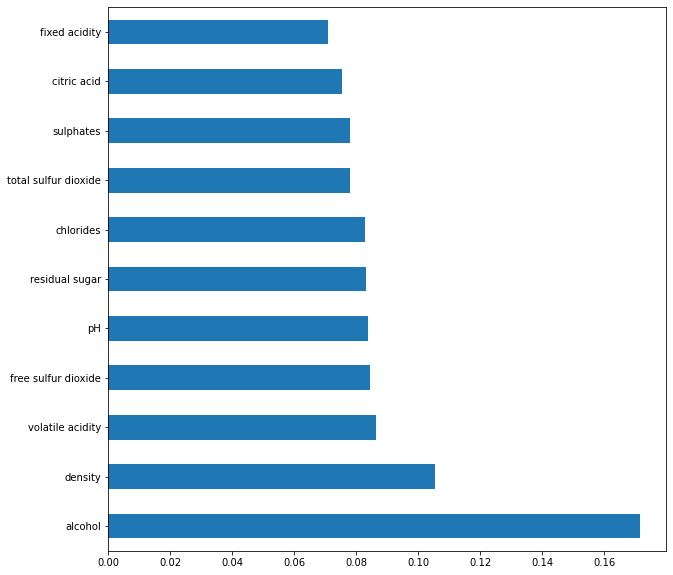

In [23]:
feat_importances = pd.Series(extraTreeModel.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

Important features: alcohol, density, volatile acidity, chlorides

### RandomForestClassifier

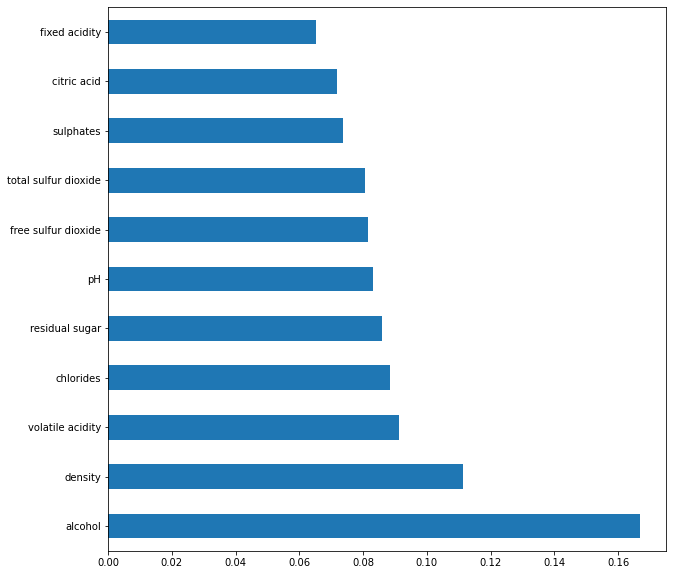

In [24]:
feat_importances = pd.Series(forestModel.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

Important features: alcohol, density, volatile acidity, chlorides

### Analysing features finally

Important features considered:
- volatile acidity: 2
- chlorides: 2
- alcohol: 2
- density: 2 

In [25]:
good_quality_df = whitewineDF.loc[whitewineDF.quality >= 7]
good_quality_df[['volatile acidity', 'chlorides', 'density', 'alcohol', 'quality']].describe() # printing only important columns

,volatile acidity,chlorides,density,alcohol,quality
count,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000
mean,0.265349,0.038160,0.992412,11.416022,7.174528
std,0.094097,0.011145,0.002772,1.255209,0.391978
min,0.080000,0.012000,0.987110,8.500000,7.000000
25%,0.190000,0.031000,0.990500,10.700000,7.000000
50%,0.250000,0.037000,0.991730,11.500000,7.000000
75%,0.320000,0.044000,0.993605,12.400000,7.000000
max,0.760000,0.135000,1.000600,14.200000,9.000000


In [26]:
bad_quality_df = whitewineDF.loc[whitewineDF.quality <= 6]
bad_quality_df[['volatile acidity', 'chlorides', 'density', 'alcohol', 'quality']].describe() # printing only important columns

,volatile acidity,chlorides,density,alcohol,quality
count,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000
mean,0.281802,0.047875,0.994474,10.265215,5.519802
std,0.102293,0.023548,0.002894,1.100576,0.604905
min,0.080000,0.009000,0.987220,8.000000,3.000000
25%,0.220000,0.037000,0.992320,9.400000,5.000000
50%,0.270000,0.045000,0.994380,10.000000,6.000000
75%,0.320000,0.051000,0.996570,11.000000,6.000000
max,1.100000,0.346000,1.038980,14.000000,6.000000
